In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
print(tf.__version__)

2.2.0


In [4]:
import pathlib

In [5]:
data_dir='/home/disorn/code_save/Project_Structure/core_program/tensorflow2_realsense/dataset/segment_color_image'

In [6]:
batch_size = 64
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AttributeError: module 'tensorflow.keras.preprocessing' has no attribute 'image_dataset_from_directory'

In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AttributeError: module 'tensorflow.keras.preprocessing' has no attribute 'image_dataset_from_directory'

In [10]:
class_names = train_ds.class_names
print(class_names)

NameError: name 'train_ds' is not defined

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

NameError: name 'train_ds' is not defined

In [29]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)


In [30]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [32]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.050413985 1.0


In [52]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
  layers.Softmax()
])

In [34]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
  layers.Softmax()
])

In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [55]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
21/21 [==============================] - 13s 622ms/step - loss: 0.5041 - accuracy: 0.7862 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 2/15
21/21 [==============================] - 12s 576ms/step - loss: 0.3134 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 3/15
21/21 [==============================] - 13s 601ms/step - loss: 0.3135 - accuracy: 1.0000 - val_loss: 0.3150 - val_accuracy: 0.9969
Epoch 4/15
21/21 [==============================] - 13s 642ms/step - loss: 0.3151 - accuracy: 0.9973 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 5/15
21/21 [==============================] - 12s 579ms/step - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 6/15
21/21 [==============================] - 12s 576ms/step - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 7/15
21/21 [==============================] - 13s 625ms/step - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000

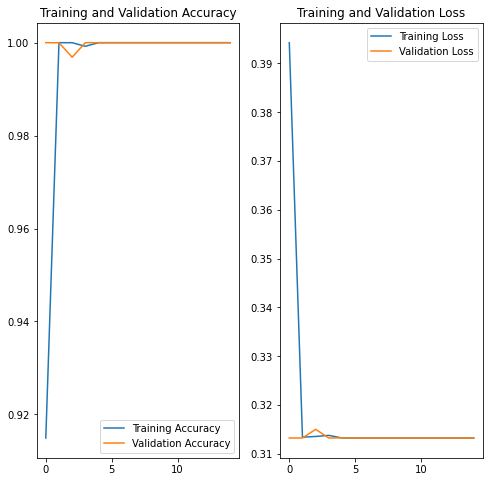

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [57]:
model.save("/home/kittipong/gg.h5")

In [58]:
predictions = model.predict(val_ds)

In [59]:
predictions[0]

array([9.999999e-01, 8.552656e-08], dtype=float32)

In [51]:
PIL.Image.open(str(gray[0]))

NameError: name 'gray' is not defined

In [ ]:
img = keras.preprocessing.image.load_img(
    data_dir, target_size=(img_height, img_width)
)